<a href="https://colab.research.google.com/github/renamanar345-glitch/tcs-internship-customer-segmentation-recommendation-system--/blob/main/implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
   CustomerID  TransactionAmount TransactionDate
0           1                152      2025-03-17
1           2                485      2025-04-19
2           3                910      2025-06-14
3           4                320      2025-05-08
4           5                156      2025-07-09

RFM Table:
            Recency  Frequency  Monetary
CustomerID                              
1               300          1       152
2               267          1       485
3               211          1       910
4               248          1       320
5               186          1       156

Customer Segments with Recommendations:
            Recency  Frequency  Monetary  Cluster Recommendation
CustomerID                                                      
1               300          1       152        2     Newsletter
2               267          1       485        0   VIP Products
3               211          1       910        0   VIP Products
4               248         

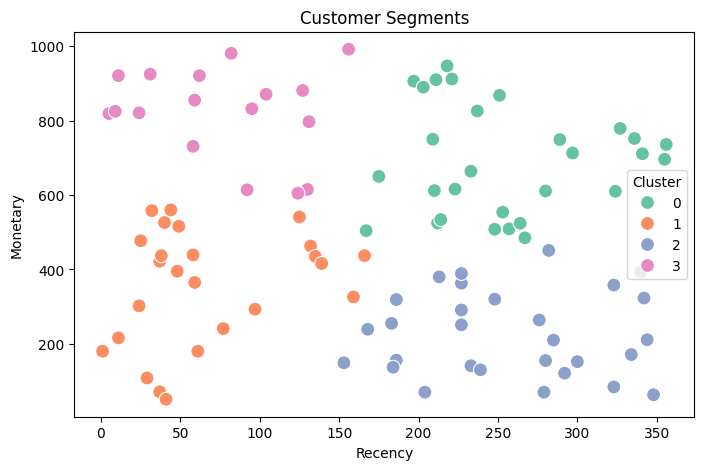

In [5]:
# ===== 1️⃣ Import Libraries =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ===== 2️⃣ Generate Sample Customer Data =====
np.random.seed(42)
n_customers = 100

data = pd.DataFrame({
    'CustomerID': range(1, n_customers+1),
    'TransactionAmount': np.random.randint(50, 1000, n_customers),
    'TransactionDate': pd.to_datetime('2026-01-15') - pd.to_timedelta(np.random.randint(1, 365, n_customers), unit='days')
})

print("Sample Data:")
print(data.head())

# ===== 3️⃣ Calculate RFM Values =====
latest_date = data['TransactionDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (latest_date - x.max()).days,
    'CustomerID': 'count',
    'TransactionAmount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

print("\nRFM Table:")
print(rfm.head())

# ===== 4️⃣ Scale Data and Cluster =====
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ===== 5️⃣ Assign Recommendations =====
def recommend(cluster):
    return ["VIP Products", "Discount Coupons", "Newsletter", "Welcome Kit"][cluster]

rfm['Recommendation'] = rfm['Cluster'].apply(recommend)

print("\nCustomer Segments with Recommendations:")
print(rfm.head())

# ===== 6️⃣ Visualize Clusters =====
plt.figure(figsize=(8,5))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', palette='Set2', data=rfm, s=100)
plt.title("Customer Segments")
plt.show()

Sample Data:
   CustomerID  TransactionAmount TransactionDate
0           1                152      2025-03-17
1           2                485      2025-04-19
2           3                910      2025-06-14
3           4                320      2025-05-08
4           5                156      2025-07-09

RFM Table:
            Recency  Frequency  Monetary
CustomerID                              
1               300          1       152
2               267          1       485
3               211          1       910
4               248          1       320
5               186          1       156

Cluster Summary:
            Recency  Frequency    Monetary
Cluster                                   
0        254.310345        1.0  691.413793
1         66.560000        1.0  358.200000
2        257.000000        1.0  228.137931
3         76.470588        1.0  823.882353

Customer Segments with Recommendations:
            Recency  Frequency  Monetary  Cluster  Segment  \
CustomerID     

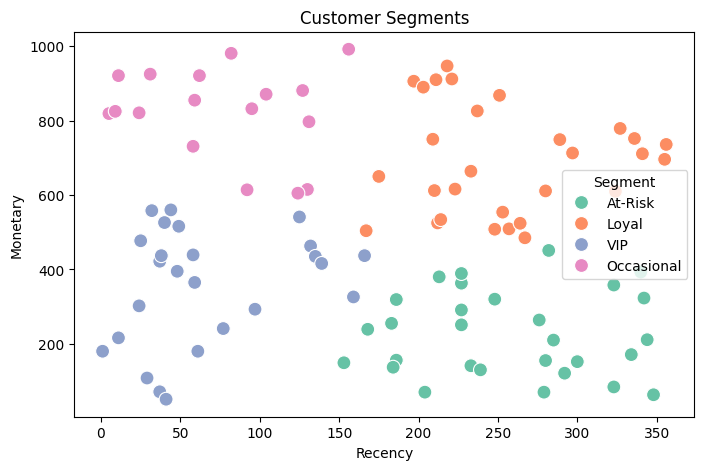

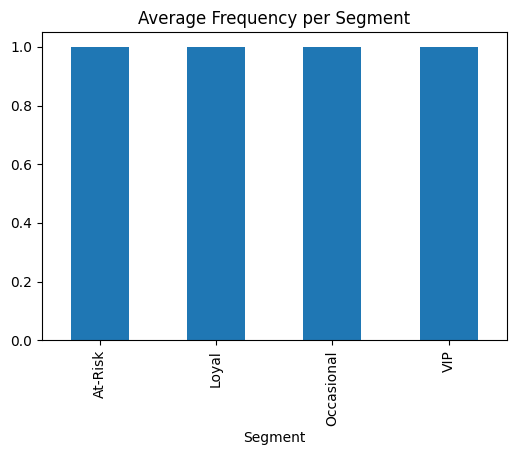

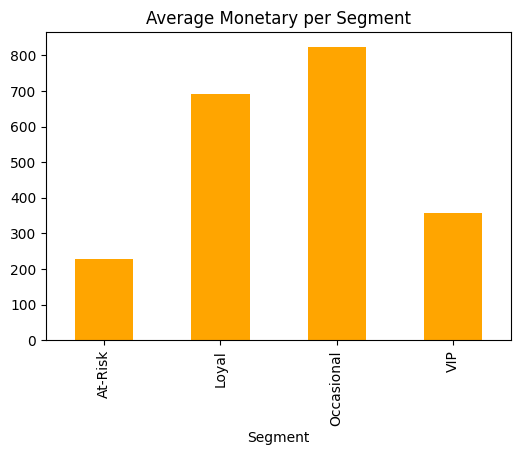

Customer segments exported to 'customer_segments.csv'


In [6]:
# ===== 1️⃣ Import Libraries =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ===== 2️⃣ Generate Sample Customer Data =====
np.random.seed(42)
n_customers = 100

data = pd.DataFrame({
    'CustomerID': range(1, n_customers+1),
    'TransactionAmount': np.random.randint(50, 1000, n_customers),
    'TransactionDate': pd.to_datetime('2026-01-15') - pd.to_timedelta(np.random.randint(1, 365, n_customers), unit='days')
})

print("Sample Data:")
print(data.head())

# ===== 3️⃣ Calculate RFM Values =====
latest_date = data['TransactionDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (latest_date - x.max()).days,
    'CustomerID': 'count',
    'TransactionAmount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

print("\nRFM Table:")
print(rfm.head())

# ===== 4️⃣ Scale Data and Cluster =====
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ===== 5️⃣ Assign Meaningful Segment Names =====
# Check cluster averages first
print("\nCluster Summary:")
print(rfm.groupby('Cluster').mean())

# Map cluster numbers to segment names (adjust based on averages)
cluster_names = {
    0: 'Loyal',
    1: 'VIP',
    2: 'At-Risk',
    3: 'Occasional'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_names)

# ===== 6️⃣ Assign Recommendations =====
def recommend(segment):
    if segment == 'VIP':
        return "Offer premium products & special discounts"
    elif segment == 'Loyal':
        return "Send thank you note & loyalty rewards"
    elif segment == 'At-Risk':
        return "Send discount coupons & re-engagement offers"
    else:
        return "Welcome kit & product suggestions"

rfm['Recommendation'] = rfm['Segment'].apply(recommend)

print("\nCustomer Segments with Recommendations:")
print(rfm.head())

# ===== 7️⃣ Visualize Clusters =====
plt.figure(figsize=(8,5))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', palette='Set2', s=100, data=rfm)
plt.title("Customer Segments")
plt.show()

# Bar chart - Frequency
rfm.groupby('Segment')['Frequency'].mean().plot(kind='bar', title='Average Frequency per Segment', figsize=(6,4))
plt.show()

# Bar chart - Monetary
rfm.groupby('Segment')['Monetary'].mean().plot(kind='bar', title='Average Monetary per Segment', color='orange', figsize=(6,4))
plt.show()

# ===== 8️⃣ Export CSV for Dashboard =====
rfm.to_csv('customer_segments.csv', index=True)
print("Customer segments exported to 'customer_segments.csv'")

CSV not found, generating sample data...
   CustomerID  TransactionAmount TransactionDate
0           1                152      2025-03-17
1           2                485      2025-04-19
2           3                910      2025-06-14
3           4                320      2025-05-08
4           5                156      2025-07-09

RFM Table:
            Recency  Frequency  Monetary
CustomerID                              
1               300          1       152
2               267          1       485
3               211          1       910
4               248          1       320
5               186          1       156

Cluster Summary:
            Recency  Frequency    Monetary
Cluster                                   
0        254.310345        1.0  691.413793
1         66.560000        1.0  358.200000
2        257.000000        1.0  228.137931
3         76.470588        1.0  823.882353

Customer Segments with Recommendations:
            Recency  Frequency  Monetary  Cluster

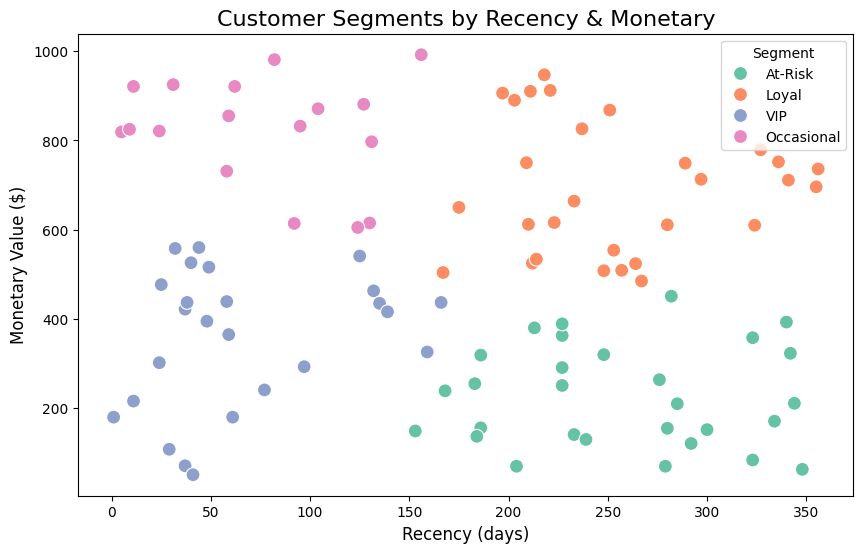

/tmp/ipython-input-1701540240.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Frequency', data=rfm, palette='Pastel1')


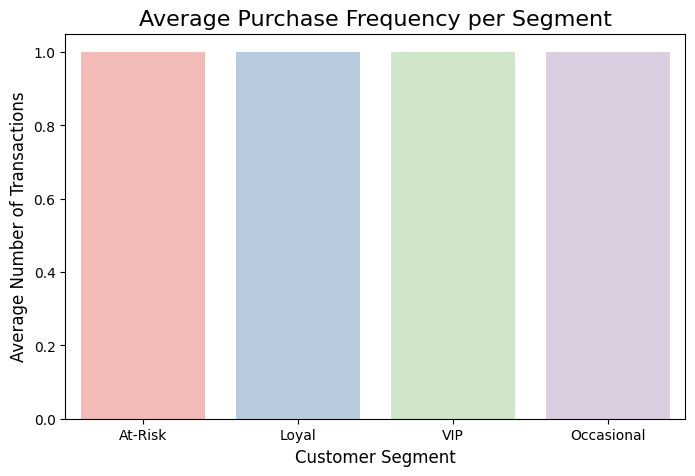

/tmp/ipython-input-1701540240.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Monetary', data=rfm, palette='Set3')


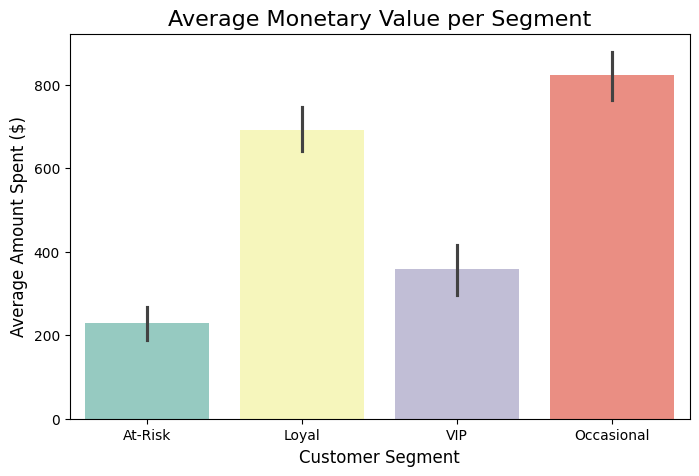

Customer segments exported to 'customer_segments.csv'
All charts saved as PNG images.


In [7]:
# ===== 1️⃣ Import Libraries =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

# ===== 2️⃣ Load Customer Data =====
# Replace 'customer_data.csv' with your own CSV file path
file_path = 'customer_data.csv'
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("Loaded your data from CSV.")
else:
    print("CSV not found, generating sample data...")
    np.random.seed(42)
    n_customers = 100
    data = pd.DataFrame({
        'CustomerID': range(1, n_customers+1),
        'TransactionAmount': np.random.randint(50, 1000, n_customers),
        'TransactionDate': pd.to_datetime('2026-01-15') - pd.to_timedelta(np.random.randint(1, 365, n_customers), unit='days')
    })

print(data.head())

# ===== 3️⃣ Calculate RFM Values =====
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
latest_date = data['TransactionDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (latest_date - x.max()).days,
    'CustomerID': 'count',
    'TransactionAmount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print("\nRFM Table:")
print(rfm.head())

# ===== 4️⃣ Scale Data and Apply K-Means =====
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ===== 5️⃣ Assign Meaningful Segment Names =====
# Check cluster averages
print("\nCluster Summary:")
print(rfm.groupby('Cluster').mean())

# Map cluster numbers to segment names (adjust based on averages if needed)
cluster_names = {0:'Loyal', 1:'VIP', 2:'At-Risk', 3:'Occasional'}
rfm['Segment'] = rfm['Cluster'].map(cluster_names)

# ===== 6️⃣ Assign Recommendations =====
def recommend(segment):
    if segment == 'VIP':
        return "Offer premium products & special discounts"
    elif segment == 'Loyal':
        return "Send thank you note & loyalty rewards"
    elif segment == 'At-Risk':
        return "Send discount coupons & re-engagement offers"
    else:
        return "Welcome kit & product suggestions"

rfm['Recommendation'] = rfm['Segment'].apply(recommend)

print("\nCustomer Segments with Recommendations:")
print(rfm.head())

# ===== 7️⃣ Visualizations =====
# Scatter plot: Recency vs Monetary
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', palette='Set2', s=100, data=rfm)
plt.title("Customer Segments by Recency & Monetary", fontsize=16)
plt.xlabel("Recency (days)", fontsize=12)
plt.ylabel("Monetary Value ($)", fontsize=12)
plt.legend(title='Segment', fontsize=10)
plt.savefig("scatter_customer_segments.png")
plt.show()

# Bar chart: Average Frequency per Segment
plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Frequency', data=rfm, palette='Pastel1')
plt.title("Average Purchase Frequency per Segment", fontsize=16)
plt.ylabel("Average Number of Transactions", fontsize=12)
plt.xlabel("Customer Segment", fontsize=12)
plt.savefig("bar_frequency.png")
plt.show()

# Bar chart: Average Monetary per Segment
plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Monetary', data=rfm, palette='Set3')
plt.title("Average Monetary Value per Segment", fontsize=16)
plt.ylabel("Average Amount Spent ($)", fontsize=12)
plt.xlabel("Customer Segment", fontsize=12)
plt.savefig("bar_monetary.png")
plt.show()

# ===== 8️⃣ Export CSV =====
rfm.to_csv('customer_segments.csv', index=True)
print("Customer segments exported to 'customer_segments.csv'")
print("All charts saved as PNG images.")